So while the book does not provide code for the 'Babylonian Algorithm', I think this makes things a little too abstract.  But before we get to the code, let's think about what it takes to compute $\sqrt{2}$.  One way to do this is to first use a little notation, like writing $x = \sqrt{2}$, which then immediately let's us write 
$$
x^{2}=2.  
$$
Said another way, we see that $\sqrt{2}$ is a root of the quadratic equation 
$$
x^{2}-2=0.
$$
So now let us write the function $f(x) = x^{2} - 2$ and note that 
$$
f(1) = -1, ~ f(2) = 2.
$$
Let's get visual:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
x = np.linspace(1,2,41)
print(x)

[1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175 1.2   1.225 1.25  1.275
 1.3   1.325 1.35  1.375 1.4   1.425 1.45  1.475 1.5   1.525 1.55  1.575
 1.6   1.625 1.65  1.675 1.7   1.725 1.75  1.775 1.8   1.825 1.85  1.875
 1.9   1.925 1.95  1.975 2.   ]


In [ ]:
y = x**2 - 2

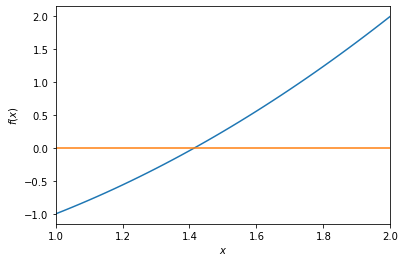

In [ ]:
plt.plot(x,y)
plt.plot(x,np.zeros(x.size))
plt.xlim(1,2)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.show()

So what we see is that since $f(x)$ is continuous and changes sign on the interval $[1,2]$, then it must be the case that 
$$
\sqrt{2} \in [1,2].
$$
Now, from the above graph, we see that the midpoint of the interval $[1,2]$, which is $1.5$, yields a positive value for $f(x)$, and this is of course true since 
$$
f\left(1.5\right) = .25.
$$
So, at this point, we might be inclined to say that 
$$
\sqrt{2} \approx 1.5
$$
since $.25$ is certainly smaller in magnitude than either $1$ or $2$.  But what if we want to do better?  Well, we still have that there is a sign change in $f(x)$ on the interval $[1,1.5]$, so it might be worth it to try this midpoint thing again.  That is, use 
$$
1.25 = \frac{1+1.5}{2},
$$ 
and then note that
$$
f(1.25) = -.4375.
$$
Now to be consistent with what we did before, we would say that 
$$
\sqrt{2} \approx 1.25
$$
though this is maybe not as great an approximation as before.  

But, we now see a method forming in all of this since I now see that I have a sign change in $f(x)$ on the interval $[1.25,1.5]$.  Now if we use the midpoint idea again, then we say that 
$$
\sqrt{2} \approx \frac{1.25 + 1.5}{2} = 1.375,
$$
and we see that 
$$
f(1.375) = -.109375.
$$
So rad, $-.109375$ is smaller in magnitude than $.25$, and so we have a demonstrably better approximation to $\sqrt{2}$.

Okay, what would you do next to generate a yet better approximation to $\sqrt{2}$?

Okay, now you probably have a general idea on how to keep this method going, and it is at this point that we should introduce notation to help turn this general idea into what we can properly call an algorithm.  To do this, we need to see that the above process started with two things:

1: A continuous function $f(x)$ 

2: An interval $[a,c]$ such that $f(a)f(c) < 0$.

To find a root of $f(x)$ in $[a,c]$, i.e. a point $x_{\ast}\in[a,b]$ such that $f(x_{\ast})=0$, we compute the midpoint of the interval $[a,c]$, i.e. we find
$$
b = \frac{a+c}{2}
$$
and say that 
$$
x_{\ast} \approx b.
$$

We then check: 

is $f(b)f(a)<0$ or is $f(b)f(a)>0$?

If $f(b)f(a)<0$, we set $c=b$ and repeat the above process.  

If $f(b)f(a)>0$, we set $a=b$ and repeat the above process. 

Okay, great.  But we are still missing something.  How do we know when to stop?  What if we pick a value, say $e$, such that we stop if 

$$
\left|a-b\right| < e.
$$

Okay, great, we now have the idea of a tolerance condition.  But how can we implement this in Python?  Well first, we need to fuss about how to describe the algorithm in more formal, graphical terms.  If for no other reason, just so you can read the book.  To do this, we use a flow chart. For the bisection method this looks like 
![title](bisection-method-flowchart.jpg)


Now, for exposure, what would this look like in Python?

In [ ]:
def bisection(f,a,c,e):
    # Bisect
    b = (a+c)/2.
    
    while abs(a-b)>=e: #Checks after each "loop" if c is finally close enough to a
        if f(a)*f(b)<0:
            c=b
        elif f(a)*f(b)>0:
            a=b
        else:
            return b
        b = (a+c)/2.
        
    return b        

In [ ]:
def fun(x):
    return x**2 - 2

In [ ]:
root2 = bisection(fun,1,2,1e-14)
print( root2)
print( root2**2.)

1.4142135623730994
2.000000000000012
